# ASSIGNMENT - forward and inverse kinematics

Robotic manipulator - reacher 2D. In that assignment we will calculate the forward and inverse kinematics for the specified robot.

![](https://drive.google.com/uc?id=1CzHKU2lyX0oOwWz--ez_fGx_T-WqSII0)

* Exemplary FK and IK assignment [link](https://cs.gmu.edu/~kosecka/cs685/kinematic-chains.pdf)
* Peter Corke's lecture about IK [link](https://www.youtube.com/watch?v=IKOGwoJ2HLk&t=299s)

# GIVEN:

*   L1, L2 - lengths of links between joints

*   THETA1, THETA2 - joint angles

# LOOKING FOR:

*   P01 and P02 coordinates with respect to the base frame - depicted as {0}



In [1]:
# import needed libraries
import numpy as np
from mpl_toolkits.mplot3d import Axes3D   
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# define some constants
FIG_SIZE = 1
CONTROL_POINTS = np.array([[0.9238795325112867, 0.3826834323650898,0], [1.1152212486938318, 0.8446231986207331,0]])
L1, L2 = 1.0, 0.5                                     # m
THETA1, THETA2 = np.deg2rad(22.5), np.deg2rad(45)   # rad

In [2]:
# define helper functions for visualization
def draw_coordinate_system(ax):
  line = np.linspace(0, FIG_SIZE, 10)
  ax.plot3D(line, np.zeros_like(line), np.zeros_like(line), 'red')
  ax.plot3D(np.zeros_like(line), line, np.zeros_like(line), 'green')
  ax.plot3D(np.zeros_like(line), np.zeros_like(line), line, 'blue')

def draw_line(ax, from_point: tuple or list, to_point: tuple or list, num_steps=10, col='magenta'):
  assert len(from_point) == len(to_point)
  points = np.array([np.linspace(pf, pt, num_steps) for pf, pt in zip(from_point, to_point)])
  ax.plot3D(points[0, :], points[1, :], points[2, :], col)

def draw_reacher_2d(pt1, pt2):
  plt.figure(figsize=(10,10))
  ax = plt.axes(projection='3d')
  ax.view_init(15, 50)
  ax.set_xlim(0, FIG_SIZE * 1.5); ax.set_ylim(0, FIG_SIZE * 1.5); ax.set_zlim(0, FIG_SIZE * 1.5);
  ax.set_xlabel('X axis'); ax.set_ylabel('Y axis'); ax.set_zlabel('Z axis');
  draw_coordinate_system(ax)

  # draw the reacher 2D
  draw_line(ax, [0, 0, 0], pt1) 
  draw_line(ax, pt1, pt2)

  # dodanie opisów punktów oraz wyświetlenie wyników
  ax.text(*[p1 + p2/2 for p1, p2 in zip(pt1, pt2)], "l2 = {}m".format(L2))
  ax.text(*[p/2 for p in pt1], "l1 = {}m".format(L1))
  ax.text(*pt2, "P02")

  # draw control points to verify the correctness of fwd kinematics equations
  ax.scatter(CONTROL_POINTS[:, 0], CONTROL_POINTS[:, 1], CONTROL_POINTS[:, 2], s=50, c="blue")
  return ax

# 1. **[TASK] Homogeneous matrices**

In that assigned you are asked to write:

* three functions rotation_x(...), rotation_y(...) and rotation_z(...) that take as an argument an angle in radians and returns elementary rotation matrix in the form of a 4x4 homogeneous matrix.

* one function that takes three translations in each axis: x, y, z and returns a 4x4 homogeneous matrix representing that translation.


In [3]:
def rotation_x(theta):
    h = np.array([
        [1,0,0,0],
        [0,np.cos(theta), -np.sin(theta),0],
        [0,np.sin(theta),np.cos(theta),0],
        [0,0,0,1]
    ])
    return h
  
def rotation_y(theta):
    h = np.array([
        [np.cos(theta),0,np.sin(theta),0],
        [0,1,0,0],
        [-np.sin(theta),0,np.cos(theta),0],
        [0,0,0,1]
    ])
    return h

def rotation_z(theta):
    h = np.array([
      [np.cos(theta),-np.sin(theta),0,0],
      [np.sin(theta),np.cos(theta),0,0],
      [0,0,1,0],
      [0,0,0,1]
  ])
    return h
  
def translation_xyz(x, y, z):
  h = np.array([
      [1,0,0,x],
      [0,1,0,y],
      [0,0,1,z],
      [0,0,0,1]
  ])
  return h

# 2. **[TASK] Forward kinematics**

In that assigned you are asked to write:

* forward kinematics equations using THETA1, THETA2, L1, L2

* draw the robot in the XYZ coordinate system

**The robot will be displayed. If the equations are correct joints should be placed in the blue spots in the figure.**

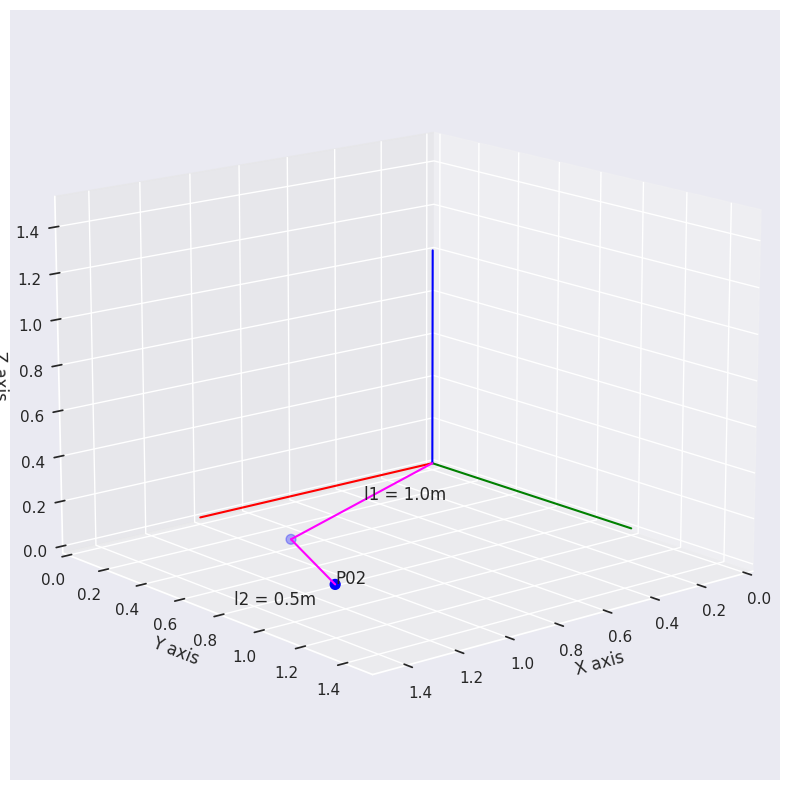

In [4]:
# FK equations
H1 = rotation_z(THETA1)@translation_xyz(L1,0,0)
H2 = rotation_z(THETA2)@translation_xyz(L2,0,0)
pt1 = [H1[0][-1], H1[1][-1], H1[2][-1]]
temp_H=H1@H2
pt2 = [temp_H[0][-1], temp_H[1][-1], temp_H[2][-1]]

# verify if the robot is properly displayed - it should has joints placed in the blue spots
ax_1 = draw_reacher_2d(pt1, pt2)

# **3. [TASK] Inverse kinematics**

In that assigned you are asked to write:

* write inverse kinematics equations using only a calculated point P2 i. e. calculate the joint angles THETA1_inv and THETA2_inv


In [5]:
from math import sqrt
from math import atan2
from math import sin
from math import cos
from math import acos

x=pt2[0]
y=pt2[1]
THETA2_inv = acos(((x**2) + (y**2) - (L1**2) - (L2**2)) / (2*L1*L2))
THETA1_inv = atan2(y, x) - atan2(L2*sin(THETA2_inv), L1 + L2*cos(THETA2_inv))

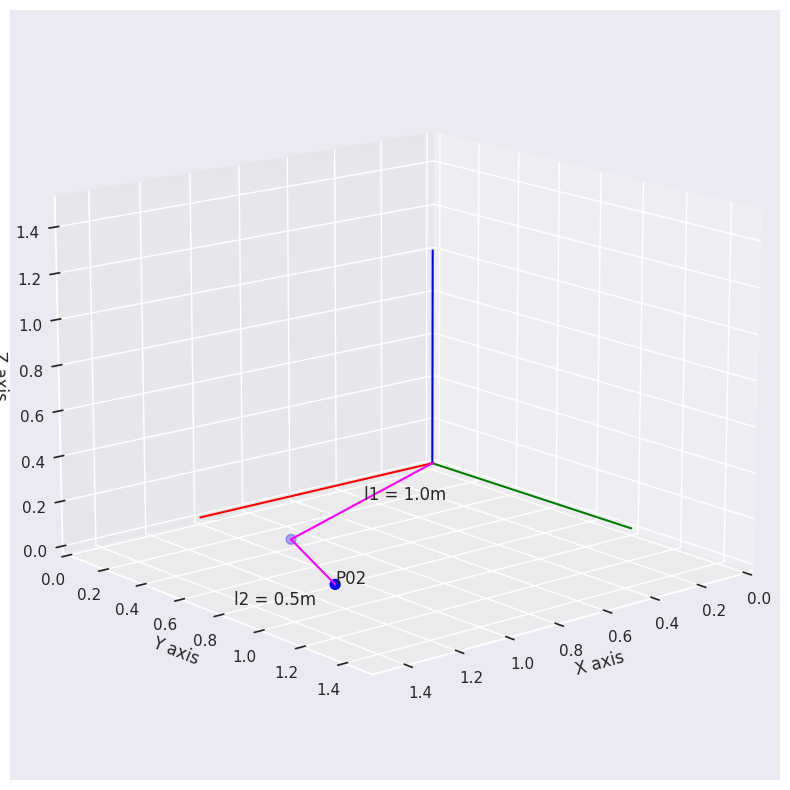

In [6]:
# you might verify your solution by running again the forward kinematics using THETA1_inv and THETA2_inv values
H1_inv = rotation_z(THETA1_inv)@translation_xyz(L1,0,0)
H2_inv = rotation_z(THETA2_inv)@translation_xyz(L2,0,0)
pt1_inv = [H1_inv[0][-1], H1_inv[1][-1], H1_inv[2][-1]]
temp_H_inv=H1_inv@H2_inv
pt2_inv = [temp_H_inv[0][-1], temp_H_inv[1][-1], temp_H_inv[2][-1]]
ax_2 = draw_reacher_2d(pt1_inv, pt2_inv)